# Read Data Sample

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",15)
%matplotlib inline

In [2]:
class dataset:
    col_names = ["duration","protocol_type","service","flag","src_bytes",
        "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
        "logged_in","num_compromised","root_shell","su_attempted","num_root",
        "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
        "is_host_login","is_guest_login","count","srv_count","serror_rate",
        "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
        "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
        "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
        "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
        "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "difficulty_level"]

    kdd_train = pd.read_csv("dataset/KDDTrain+.txt",names = col_names,)
    kdd_test = pd.read_csv("dataset/KDDTest+.txt",names = col_names,)
    
    kdd_train_ = pd.read_csv("dataset/KDDTrain+_20Percent.txt",names = col_names,)
    kdd_test_ = pd.read_csv("dataset/KDDTest-21.txt",names = col_names,)
    

    kdd_diff_level_train = kdd_train["difficulty_level"].copy()
    kdd_diff_level_test = kdd_test["difficulty_level"].copy()
    
    kdd_train = kdd_train.drop("difficulty_level", axis = 1)
    kdd_test = kdd_test.drop("difficulty_level", axis = 1)
    
    kdd_train_ = kdd_train_.drop("difficulty_level", axis = 1) #labels ['difficulty_level'] not contained in axis

    kdd_test_ = kdd_test_.drop("difficulty_level", axis = 1)
    
    kdd_train.to_csv("dataset/KDDTrain+.csv")
    kdd_test.to_csv("dataset/KDDTest+.csv")
    
    kdd_train_.to_csv("dataset/KDDTrain_.csv")
    kdd_test_.to_csv("dataset/KDDTest_.csv")
    


In [3]:
category_variables = ["protocol_type","service","flag"]
for cv in category_variables:
    dataset.kdd_train[cv] = dataset.kdd_train[cv].astype("category")
    dataset.kdd_test[cv] = dataset.kdd_test[cv].astype("category", 
                                                       categories = dataset.kdd_train[cv].cat.categories)
    
    dataset.kdd_train_[cv] = dataset.kdd_train_[cv].astype("category", 
                                                       categories = dataset.kdd_train[cv].cat.categories)
    dataset.kdd_test_[cv] = dataset.kdd_test_[cv].astype("category", 
                                                       categories = dataset.kdd_train[cv].cat.categories)
    
    print("Length of Categories for {} are {}".format(cv , len(dataset.kdd_train[cv].cat.categories)))
    print("Categories for {} are {} \n".format(cv ,dataset.kdd_train[cv].cat.categories))

Length of Categories for protocol_type are 3
Categories for protocol_type are Index(['icmp', 'tcp', 'udp'], dtype='object') 

Length of Categories for service are 70
Categories for service are Index(['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns',
       'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
       'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
       'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001',
       'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp',
       'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp',
       'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer',
       'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net',
       'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i',
       'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
      dtype='object') 

Length of Categories for flag ar

In [4]:
dataset.kdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125966,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125967,0,tcp,http,SF,359,375,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal


In [5]:
dataset.kdd_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
5,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1,tcp,smtp,SF,2599,293,0,0,0,0,...,186,0.73,0.13,0.00,0.00,0.00,0.0,0.26,0.00,mailbomb
22538,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,smurf


In [6]:
dataset.kdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset.kdd_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print("Column - Label")
print("Unique values: \n{}".format(dataset.kdd_train.label))
print("\nStatistical properties: \n{}".format(dataset.kdd_train.label.describe()))

Column - Label
Unique values: 
0          normal
1          normal
2         neptune
3          normal
4          normal
5         neptune
6         neptune
           ...   
125966    neptune
125967     normal
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: label, Length: 125973, dtype: object

Statistical properties: 
count     125973
unique        23
top       normal
freq       67343
Name: label, dtype: object


In [9]:
attack_types = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

is_attack = {
    "DoS":"Attack",
    "R2L":"Attack",
    "U2R":"Attack",
    "Probe":"Attack",
    "normal":"Normal"
}

In [10]:
dataset.kdd_train["type"] = dataset.kdd_train.label.map(lambda x: attack_types[x])
dataset.kdd_train["is"] = dataset.kdd_train.type.map(lambda x: is_attack[x])

dataset.kdd_test["type"] = dataset.kdd_test.label.map(lambda x: attack_types[x])
dataset.kdd_test["is"] = dataset.kdd_test.type.map(lambda x: is_attack[x])

dataset.kdd_train_["type"] = dataset.kdd_train_.label.map(lambda x: attack_types[x])
dataset.kdd_train_["is"] = dataset.kdd_train_.type.map(lambda x: is_attack[x])

dataset.kdd_test_["type"] = dataset.kdd_test_.label.map(lambda x: attack_types[x])
dataset.kdd_test_["is"] = dataset.kdd_test_.type.map(lambda x: is_attack[x])

In [11]:
kdd_attack_type_group = dataset.kdd_train.groupby("type")
kdd_is_attack_group = dataset.kdd_train.groupby("is")

In [12]:
kdd_attack_type_group.type.count()

type
DoS       45927
Probe     11656
R2L         995
U2R          52
normal    67343
Name: type, dtype: int64

In [13]:
kdd_is_attack_group["is"].count()

is
Attack    58630
Normal    67343
Name: is, dtype: int64

In [14]:
df = dataset.kdd_train.set_index("is")
df.loc["Attack"].label.unique()

array(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop',
       'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'], dtype=object)

In [15]:
df.loc["Normal"].label.unique()

array(['normal'], dtype=object)

In [16]:
#kdd_is_attack_group.hist(figsize=[25,22])

In [17]:
#kdd_attack_type_group.hist(figsize=[25,22])

In [18]:
gb = dataset.kdd_diff_level_train.groupby(dataset.kdd_diff_level_train)
(gb.count() / dataset.kdd_diff_level_train.count())*100

difficulty_level
0      0.052392
1      0.049217
2      0.042866
3      0.051598
4      0.062712
5      0.064299
6      0.076207
        ...    
15     3.167345
16     1.899613
17     2.440205
18    16.405897
19     8.163654
20    15.351702
21    49.659054
Name: difficulty_level, Length: 22, dtype: float64

In [19]:
gb = dataset.kdd_diff_level_test.groupby(dataset.kdd_diff_level_test)
(gb.count() / dataset.kdd_diff_level_test.count())*100

difficulty_level
0      0.545600
1      0.385912
2      0.243967
3      0.514549
4      0.448013
5      0.456884
6      0.696416
        ...    
15     5.216466
16     3.020759
17     5.180979
18    13.160930
19     3.947835
20     5.957239
21    47.436125
Name: difficulty_level, Length: 22, dtype: float64

In [20]:
dummy_variables_2labels = [*category_variables, "is"]
dummy_variables_5labels = [*category_variables, "type"]
attack_codes_2labels = {"Attack":1, "Normal":0}
attack_codes_5labels = {'DoS':1, 'normal':0, 'Probe':2, 'R2L':3, 'U2R':4}
    
class preprocessing:
    kdd_train_2labels = pd.get_dummies(dataset.kdd_train, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    kdd_train_5labels = pd.get_dummies(dataset.kdd_train, columns = dummy_variables_5labels, prefix=dummy_variables_5labels)

    kdd_test_2labels = pd.get_dummies(dataset.kdd_test, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    kdd_test_5labels = pd.get_dummies(dataset.kdd_test, columns = dummy_variables_5labels, prefix=dummy_variables_5labels)

    kdd_train__2labels = pd.get_dummies(dataset.kdd_train_, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    kdd_train__5labels = pd.get_dummies(dataset.kdd_train_, columns = dummy_variables_5labels, prefix=dummy_variables_5labels)
        
    kdd_test__2labels = pd.get_dummies(dataset.kdd_test_, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    kdd_test__5labels = pd.get_dummies(dataset.kdd_test_, columns = dummy_variables_5labels, prefix=dummy_variables_5labels)


    kdd_train_2labels_y = dataset.kdd_train["is"].copy() # For SVM
    kdd_train_5labels_y = dataset.kdd_train["type"].copy() # For SVM

    kdd_test_2labels_y = dataset.kdd_test["is"].copy() # For SVM
    kdd_test_5labels_y = dataset.kdd_test["type"].copy() # For SVM
    
    kdd_train__2labels_y = dataset.kdd_train_["is"].copy() # For SVM
    kdd_train__5labels_y = dataset.kdd_train_["type"].copy() # For SVM
    
    kdd_test__2labels_y = dataset.kdd_test_["is"].copy() # For SVM
    kdd_test__5labels_y = dataset.kdd_test_["type"].copy() # For SVM

    kdd_train_2labels.drop(["label", "type"], axis=1, inplace=True)
    kdd_test_2labels.drop(["label", "type"], axis=1, inplace=True)
    
    kdd_train__2labels.drop(["label", "type"], axis=1, inplace=True)
    kdd_test__2labels.drop(["label", "type"], axis=1, inplace=True)

    kdd_train_5labels.drop(["label", "is"], axis=1, inplace=True)
    kdd_test_5labels.drop(["label", "is"], axis=1, inplace=True)
    
    kdd_train__5labels.drop(["label", "is"], axis=1, inplace=True)
    kdd_test__5labels.drop(["label", "is"], axis=1, inplace=True)
    
    kdd_train_2labels_y = kdd_train_2labels_y.map(lambda x: attack_codes_2labels[x])
    kdd_test_2labels_y = kdd_test_2labels_y.map(lambda x: attack_codes_2labels[x])
    
    kdd_train__2labels_y = kdd_train__2labels_y.map(lambda x: attack_codes_2labels[x])
    kdd_test__2labels_y = kdd_test__2labels_y.map(lambda x: attack_codes_2labels[x])
    
    kdd_train_5labels_y = kdd_train_5labels_y.map(lambda x: attack_codes_5labels[x])
    kdd_test_5labels_y = kdd_test_5labels_y.map(lambda x: attack_codes_5labels[x])
    
    kdd_train__5labels_y = kdd_train__5labels_y.map(lambda x: attack_codes_5labels[x])
    kdd_test__5labels_y = kdd_test__5labels_y.map(lambda x: attack_codes_5labels[x])
    

In [21]:
preprocessing.kdd_train_2labels.columns.to_series().to_csv("dataset/columns_2labels.csv")
preprocessing.kdd_train_5labels.columns.to_series().to_csv("dataset/columns_5labels.csv")

In [22]:
preprocessing.kdd_train_2labels.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'is_Attack', 'is_Normal'],
      dtype='object', length=124)

In [23]:
preprocessing.kdd_train_2labels.shape

(125973, 124)

In [24]:
preprocessing.kdd_train_5labels.shape

(125973, 127)

In [25]:
preprocessing.kdd_test_2labels.shape

(22544, 124)

In [26]:
preprocessing.kdd_test_5labels.shape

(22544, 127)

In [27]:
preprocessing.kdd_train_2labels_y.shape

(125973,)

In [28]:
preprocessing.kdd_test_2labels_y.shape

(22544,)

In [29]:
preprocessing.kdd_train_5labels_y.shape

(125973,)

In [30]:
preprocessing.kdd_test_5labels_y.shape

(22544,)

In [31]:
import matplotlib
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing as ps
from pandas.plotting import radviz
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

df_train = preprocessing.kdd_train_2labels.drop(["is_Attack", "is_Normal"], axis = 1)
df_test = preprocessing.kdd_test_2labels.drop(["is_Attack", "is_Normal"], axis = 1)
df_train = pd.concat([df_train, preprocessing.kdd_train_2labels_y], axis = 1)
df_test = pd.concat([df_test, preprocessing.kdd_test_2labels_y], axis = 1)



In [32]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
#sample = df_train.sample(int(df_train.shape[0]*.1)) # 10% of total data
#sample.to_pickle("dataset/tsne_sample.pkl")
sample = pd.read_pickle("dataset/tsne_sample.pkl")



In [33]:
x_tsne = sample.iloc[:, :-1]
y_tsne = sample.iloc[:, -1]


from sklearn.decomposition import SparsePCA
pca_analysis = SparsePCA(n_components=40)
#x_tsne_pca = pca_analysis.fit_transform(x_tsne)



In [34]:
#pd.DataFrame(x_tsne_pca).to_pickle("dataset/tsne_pca_df.pkl")
x_tsne_pca = pd.read_pickle("dataset/tsne_pca_df.pkl").values

KeyboardInterrupt: 

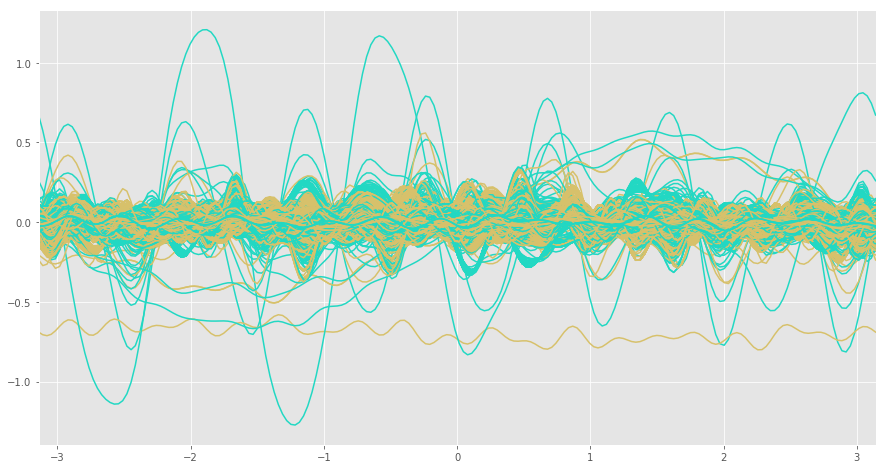

In [50]:
plt.figure(figsize=(15,8))
x_tsne_pca_df = pd.DataFrame(x_tsne_pca)
x_tsne_pca_df['is'] = y_tsne.values

#andrews_curves(x_tsne_pca_df, "is")

In [ ]:
#df = model.fit_transform(x_tsne_pca) 
#df1 = model.fit_transform(df)
#df2 = model.fit_transform(df1) 
#df3 = model.fit_transform(df2) 

In [ ]:
#pd.DataFrame(df).to_pickle("dataset/tsne_df.pkl")
#pd.DataFrame(df1).to_pickle("dataset/tsne_df1.pkl")
#pd.DataFrame(df2).to_pickle("dataset/tsne_df2.pkl")
#pd.DataFrame(df3).to_pickle("dataset/tsne_df3.pkl")

In [ ]:

df = pd.read_pickle("dataset/tsne_df.pkl").values
df1 = pd.read_pickle("dataset/tsne_df1.pkl").values
df2 = pd.read_pickle("dataset/tsne_df2.pkl").values
df3 = pd.read_pickle("dataset/tsne_df3.pkl").values

In [ ]:

#plt.figure(figsize=(15,8))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,5))

ax1.scatter(x = df[y_tsne==0,0], y = df[y_tsne==0,1], label = 'Normal')
ax1.scatter(x = df[y_tsne==1,0], y = df[y_tsne==1,1], label = 'Attack')
ax1.title.set_text("After 1000 epochs")

ax2.scatter(x = df1[y_tsne==0,0], y = df1[y_tsne==0,1], label = 'Normal')
ax2.scatter(x = df1[y_tsne==1,0], y = df1[y_tsne==1,1], label = 'Attack')
ax2.title.set_text("After 2000 epochs")

ax3.scatter(x = df2[y_tsne==0,0], y = df2[y_tsne==0,1], label = 'Normal')
ax3.scatter(x = df2[y_tsne==1,0], y = df2[y_tsne==1,1], label = 'Attack')
ax3.title.set_text("After 3000 epochs")

ax4.scatter(x = df3[y_tsne==0,0], y = df3[y_tsne==0,1], label = 'Normal')
ax4.scatter(x = df3[y_tsne==1,0], y = df3[y_tsne==1,1], label = 'Attack')
ax4.title.set_text("After 4000 epochs")

plt.subplots_adjust(wspace=0.05, hspace=0.18)
ax1.legend(loc=0)




In [ ]:
preprocessing.kdd_train_2labels.to_pickle("dataset/kdd_train_2labels.pkl")
preprocessing.kdd_train_2labels_y.to_pickle("dataset/kdd_train_2labels_y.pkl")

preprocessing.kdd_train_5labels.to_pickle("dataset/kdd_train_5labels.pkl")
preprocessing.kdd_train_5labels_y.to_pickle("dataset/kdd_train_5labels_y.pkl")

preprocessing.kdd_train__2labels.to_pickle("dataset/kdd_train__2labels.pkl")
preprocessing.kdd_train__2labels_y.to_pickle("dataset/kdd_train__2labels_y.pkl")

preprocessing.kdd_train__5labels.to_pickle("dataset/kdd_train__5labels.pkl")
preprocessing.kdd_train__5labels_y.to_pickle("dataset/kdd_train__5labels_y.pkl")

In [ ]:

preprocessing.kdd_test_5labels_y.to_pickle("dataset/kdd_test_5labels_y.pkl")

preprocessing.kdd_test__5labels.to_pickle("dataset/kdd_test__5labels.pkl")
preprocessing.kdd_test__5labels_y.to_pickle("dataset/kdd_test__5labels_y.pkl")

In [ ]:
dataset.kdd_diff_level_train.to_pickle("dataset/kdd_diff_level_train.pkl")
dataset.kdd_diff_level_test.to_pickle("dataset/kdd_diff_level_test.pkl")